<a href="https://colab.research.google.com/github/ehpub/kfq_ML_2023/blob/main/kfq2023_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
path = '/content/drive/MyDrive/mldata/train_titanic.csv'

In [ ]:
import pandas as pd
df = pd.read_csv(path)
cdf = df.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Cabin'] = df['Cabin'].fillna('N')
df['Embarked'] = df['Embarked'].fillna('N')
df.info()
cdf2 = df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
df['Cabin'].value_counts()

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [ ]:
df['Name'].value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

In [ ]:
g = df.groupby(['Sex','Survived'])
g['Sex'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Sex, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

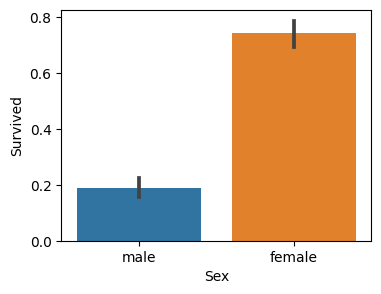

In [ ]:
plt.figure(figsize=(4,3))
ax = plt.gca()
sns.barplot(x='Sex',y='Survived' ,data = df,ax=ax)
plt.show()

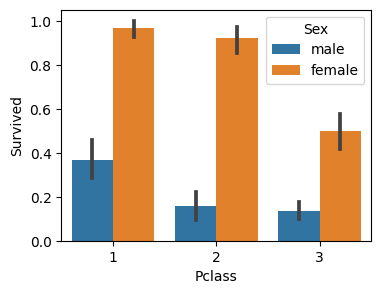

In [ ]:
plt.figure(figsize=(4,3))
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=df)
plt.show()

In [ ]:
def get_age_category(age):
  cate = ""
  if age <0: cate = 'Unknown'
  elif age<=5: cate = 'B'
  elif age<=12: cate = 'C'
  elif age<=18: cate = 'T'
  elif age<=25: cate = 'S'
  elif age<=35: cate = 'Y'
  elif age<=60: cate = 'A'
  else: cate='E'
  return cate

In [ ]:
df['Age'] = df['Age'].apply(lambda x:get_age_category(x))

In [ ]:
df['Age'].value_counts()

Y    373
A    195
S    162
T     70
B     44
C     25
E     22
Name: Age, dtype: int64

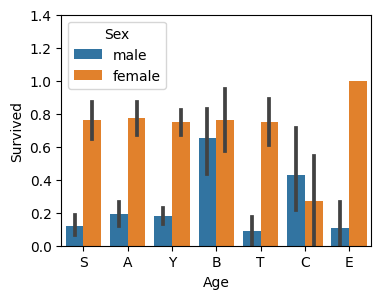

In [ ]:
plt.figure(figsize=(4,3))
sns.barplot(x='Age',y='Survived',hue='Sex',data=df)
plt.ylim(0,1.4)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df['Cabin'] = df['Cabin'].str[:1]
df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [ ]:
def encode_features(df,columns):
  for column in columns:
    le = LabelEncoder()
    le.fit(df[column])
    df[column] = le.transform(df[column])
  return df

In [ ]:
df = encode_features(df,['Cabin','Sex','Embarked','Age'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 83.7+ KB


In [ ]:
def get_callname(name):
  name = name.replace(' ' ,'')
  d1,d2 = name.split(',')
  dd2 = d2.split('.')
  return dd2[0]

In [ ]:
get_callname(df["Name"][0])

'Mr'

In [ ]:
df['Name'] = df['Name'].apply(lambda x:get_callname(x))
df['Name'].value_counts()

Mr             517
Miss           182
Mrs            125
Master          40
Dr               7
Rev              6
Mlle             2
Major            2
Col              2
theCountess      1
Capt             1
Ms               1
Sir              1
Lady             1
Mme              1
Don              1
Jonkheer         1
Name: Name, dtype: int64

In [ ]:
def callname2num(cn):
  cns = ["Mr","Miss","Mrs","Master","Dr","Rev"]
  for i , ecn in enumerate(cns):
    if ecn == cn:
      return i
  return len(cns)

In [ ]:
df['Name'] = df['Name'].apply(lambda x:callname2num(x))
df['Name'].value_counts()

0    517
1    182
2    125
3     40
6     14
4      7
5      6
Name: Name, dtype: int64

In [ ]:
df['Name'].corr(df['Survived'])

0.37464242776723583

In [ ]:
df.corr()

<ipython-input-78-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.021651,0.042939,-0.015596,-0.057527,-0.001652,0.012658,-0.033080,0.009305
Survived,-0.005007,1.000000,-0.338481,0.374642,-0.543351,-0.060861,-0.035322,0.081629,0.257307,-0.295113,-0.174963
Pclass,-0.035144,-0.338481,1.000000,-0.204056,0.131900,0.244182,0.083081,0.018443,-0.549500,0.742093,0.197493
Name,0.021651,0.374642,-0.204056,1.000000,-0.447982,-0.230188,0.218606,0.256014,0.125208,-0.168743,-0.084963
Sex,0.042939,-0.543351,0.131900,-0.447982,1.000000,0.033941,-0.114631,-0.245489,-0.182333,0.118635,0.106395
Age,-0.015596,-0.060861,0.244182,-0.230188,0.033941,1.000000,-0.070245,-0.237680,-0.127453,0.213411,-0.025683
SibSp,-0.057527,-0.035322,0.083081,0.218606,-0.114631,-0.070245,1.000000,0.414838,0.159651,0.041058,0.068043
Parch,-0.001652,0.081629,0.018443,0.256014,-0.245489,-0.237680,0.414838,1.000000,0.216225,-0.031553,0.032517
Fare,0.012658,0.257307,-0.549500,0.125208,-0.182333,-0.127453,0.159651,0.216225,1.000000,-0.525742,-0.246359
Cabin,-0.033080,-0.295113,0.742093,-0.168743,0.118635,0.213411,0.041058,-0.031553,-0.525742,1.000000,0.227505


In [ ]:
df = df.drop(['PassengerId','Ticket'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    int64  
 3   Sex       891 non-null    int64  
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Cabin     891 non-null    int64  
 9   Embarked  891 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 69.7 KB


In [ ]:
data = df.drop('Survived',axis=1)
label = df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data,label)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
pred = model.predict(x_test)
print("accuracy:",accuracy_score(y_test,pred))

accuracy: 0.7937219730941704


In [ ]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
pred = model.predict(x_test)
print("accuracy:",accuracy_score(y_test,pred))

accuracy: 0.8295964125560538


In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
print("accuracy:",accuracy_score(y_test,pred))

accuracy: 0.8026905829596412


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.model_selection import KFold
import numpy as np

In [ ]:
def exec_kfold(model,data,label,folds=5):
  print(model.__class__.__name__)
  kfold = KFold(n_splits=folds)
  ss = []
  for i, (train_ind,val_ind) in enumerate(kfold.split(data)):
    x_train,x_val = data.values[train_ind], data.values[val_ind]
    y_train,y_val = label.values[train_ind], label.values[val_ind]
    model.fit(x_train,y_train)
    pred = model.predict(x_val)
    score = accuracy_score(y_val,pred)
    ss.append(score)
    print(i+1,"번 acc:",score)
  print("평균:",np.mean(ss))

In [ ]:
model1 = DecisionTreeClassifier()
exec_kfold(model1,data,label)
model2 = RandomForestClassifier()
exec_kfold(model2,data,label)
model3 = LogisticRegression()
exec_kfold(model3,data,label)

DecisionTreeClassifier
1 번 acc: 0.8156424581005587
2 번 acc: 0.7696629213483146
3 번 acc: 0.8033707865168539
4 번 acc: 0.7640449438202247
5 번 acc: 0.8370786516853933
평균: 0.7979599522942691
RandomForestClassifier
1 번 acc: 0.8100558659217877
2 번 acc: 0.7808988764044944
3 번 acc: 0.8370786516853933
4 번 acc: 0.7865168539325843
5 번 acc: 0.8314606741573034
평균: 0.8092021844203126
LogisticRegression
1 번 acc: 0.7821229050279329
2 번 acc: 0.8033707865168539
3 번 acc: 0.797752808988764
4 번 acc: 0.7696629213483146
5 번 acc: 0.8089887640449438
평균: 0.792379637185362


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
model1 = DecisionTreeClassifier()
print(np.mean(cross_val_score(model1,data,label,cv=5)))
model2 = RandomForestClassifier()
print(np.mean(cross_val_score(model2,data,label,cv=5)))
model3 = LogisticRegression()
print(np.mean(cross_val_score(model3,data,label,cv=5)))

0.7811562362689097
0.8024606113866046
0.7878978093026175


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    'max_depth':[2,3,5,10],
    'min_samples_split':[2,3,5],
    'min_samples_leaf':[2,3,5,10,20]
}

In [ ]:
model = RandomForestClassifier()
gr = GridSearchCV(model,param_grid=params,scoring='accuracy',cv=5)
gr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [2, 3, 5, 10, 20],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')

In [ ]:
print("파라미터:",gr.best_params_)

파라미터: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3}


In [ ]:
print("스코어:",gr.best_score_)

스코어: 0.817439120188531


In [ ]:
bm = gr.best_estimator_

In [ ]:
bm

RandomForestClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=3)